In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [342]:
df_knn = pd.read_csv("HPI_KNN_final1.csv",parse_dates=['DATE'], index_col='DATE')
df_knn.head()

,hpi,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.965,4722.156000,6.6,85.252400,3820.2,241857.0,1690.0,1774.0,1.989516,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0,1,1,1987,3
1987-02-01,64.423,4774.223002,6.6,85.768367,3845.0,242005.0,1689.0,1784.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0,1,2,1987,6
1987-03-01,64.735,4803.592036,6.6,86.060968,3863.8,242166.0,1704.0,1726.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0,1,3,1987,6
1987-04-01,65.131,4806.160000,6.3,86.089600,3875.4,242338.0,1601.0,1614.0,1.989517,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0,2,4,1987,2
1987-05-01,65.563,4834.203183,6.3,86.370671,3908.6,242516.0,1500.0,1628.0,1.989525,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0,2,5,1987,4


In [343]:
df_knn.isna().sum()

hpi                         0
gdp                         0
unemployment                0
property_price              0
personal_income             0
population                  0
permit                      0
new_homes                   0
delinquency                 0
men_married                 0
men_unmarried_divorced      0
men_unmarried_widowed       0
women_married               0
women_unmarried_divorced    0
women_unmarried_widowed     0
immigrants                  0
quarter                     0
month                       0
year                        0
weekofyear                  0
dtype: int64

In [344]:
X = df_knn.drop(columns="hpi")
y = df_knn["hpi"]

In [345]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [346]:
print(X_train.shape)
print(X_test.shape)

(359, 19)
(90, 19)


# **MODEL TRAINING WITH KNN DATA**

In [347]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
en = ElasticNet()
ra = RandomForestRegressor()
gb = GradientBoostingRegressor()
xb = XGBRegressor()
de = DecisionTreeRegressor()

model = [lr,la,ri,ra,gb,xb,de]

In [348]:
model

[LinearRegression(),
 Lasso(),
 Ridge(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 DecisionTreeRegressor()]

In [349]:
X_train.sample(5)

,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,
1993-10-01,7013.738000,6.8,83.571100,5669.1,261294.0,1287.0,1392.0,2.4400,56833.0,6778.0,2468.0,57768.0,9883.0,11214.0,903916.0,4,10,1993,4
2020-01-01,21706.513000,3.6,133.647600,18821.5,331443.0,1507.0,1578.0,2.3500,68431.0,10667.0,3479.0,69341.0,14681.0,11267.0,707362.0,1,1,2020,2
1992-01-01,6363.102000,7.3,85.916400,5264.8,255331.0,1077.0,1176.0,3.1200,62535.0,8980.0,2648.0,63345.0,12829.0,11146.0,973445.0,1,1,1992,2
2011-04-01,15557.539000,9.1,93.977900,13212.8,311740.0,581.0,554.0,10.5500,64381.0,10670.0,2929.0,65000.0,13762.0,11306.0,1062040.0,2,4,2011,4
2011-08-01,15662.201285,9.0,94.066587,13400.3,312605.0,647.0,585.0,10.4282,64381.0,10670.0,2929.0,65000.0,13762.0,11306.0,1062040.0,3,8,2011,0


In [350]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**EVALUATION**

In [351]:
model_name = ["LinearRegression","Lasso","Ridge","ElasticNet","RandomForestRegressor","GradientBoostingRegressor","XGBRegressor","DecisionTreeRegressor"]
for name,i in zip(model_name,model):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    n = X_test.shape[0]  
    k = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    print(f"{name} =   MAE: {round(mae,4)},   RMSE: {round(rmse,4)},   Adjusted_r2_score: {round((adjusted_r2*100),4)}")
    print()

LinearRegression =   MAE: 3.4371,   RMSE: 4.3117,   Adjusted_r2_score: 99.5526

Lasso =   MAE: 3.5139,   RMSE: 4.4963,   Adjusted_r2_score: 99.5134

Ridge =   MAE: 3.4493,   RMSE: 4.3167,   Adjusted_r2_score: 99.5515

ElasticNet =   MAE: 0.737,   RMSE: 1.4361,   Adjusted_r2_score: 99.9504

RandomForestRegressor =   MAE: 1.0427,   RMSE: 1.624,   Adjusted_r2_score: 99.9365

GradientBoostingRegressor =   MAE: 1.1131,   RMSE: 1.6794,   Adjusted_r2_score: 99.9321

XGBRegressor =   MAE: 1.3684,   RMSE: 2.4622,   Adjusted_r2_score: 99.8541



# **MODEL TRAINING WITH MICE DATA**

In [352]:
df_mice = pd.read_csv("HPI_MICE_final_2.csv")

In [353]:
df_mice

,hpi,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants
0,63.965,4722.156000,6.6,85.252400,3820.2,241857.0,1690.0,1774.0,-0.944575,54059.326927,5689.178962,2134.665421,55162.561103,8218.932526,11006.097501,5.998890e+05
1,64.423,4489.181078,6.6,91.600097,3845.0,242005.0,1689.0,1784.0,-1.609230,54490.935239,5639.993141,2084.094321,55606.646123,8277.717102,10996.091988,5.998890e+05
2,64.735,4482.857503,6.6,91.826853,3863.8,242166.0,1704.0,1726.0,-1.553009,54526.167101,5656.130671,2081.018766,55644.436680,8291.152538,11001.964519,5.998890e+05
3,65.131,4806.160000,6.3,86.089600,3875.4,242338.0,1601.0,1614.0,-0.841724,54286.526111,5733.390857,2118.987565,55373.430645,8253.062577,10988.044253,5.998890e+05
4,65.563,4521.112347,6.3,86.167320,3908.6,242516.0,1500.0,1628.0,-1.215847,54532.002002,5676.083100,2091.375617,55660.469622,8285.649617,11004.528354,5.998890e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,315.787,28269.174000,3.7,160.616300,23560.0,336194.0,1508.0,1376.0,1.710000,68161.631394,11183.242814,3885.255904,68610.199654,14730.106567,11297.114754,1.003045e+06
445,317.332,27338.670941,3.9,147.074280,23626.3,336306.0,1563.0,1546.0,1.551618,67557.578116,11044.976512,3939.149027,68220.101117,14722.088232,11512.615693,1.002834e+06
446,318.308,27363.215087,3.8,145.093324,23746.6,336423.0,1485.0,1299.0,1.818418,67632.910890,11044.598508,3932.427413,68308.262115,14694.044333,11533.344469,1.002924e+06
447,319.326,28629.153000,3.9,144.354708,23799.3,336550.0,1440.0,1377.0,1.730000,67133.669111,11310.369959,4014.803823,67650.249987,14641.010207,11345.778591,1.002825e+06


In [354]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

In [355]:
X = df_mice.drop(columns="hpi")
y = df_mice["hpi"]

**EVALUATION**

In [356]:
for name, i in zip(model_name, model):
    print(name)
    mae_score = -1 * cross_val_score(Pipeline([('transformer', scaler), ('regressor', i)]), X, y, scoring='neg_mean_absolute_error', cv=5).mean()
    rmse_score = -1 * cross_val_score(Pipeline([('transformer', scaler), ('regressor', i)]), X, y, scoring='neg_root_mean_squared_error', cv=5).mean()
    Accuracy = np.mean(cross_val_score(estimator=i, X=X_train, y=y_train, cv=5))
    print(f"Cross-Validation of MAE: {mae_score}")
    print(f"Cross-Validation of RMSE: {rmse_score}")
    print(f"Cross-Validation of Accuracy: {round(Accuracy*100,4)}")
    print()

LinearRegression
Cross-Validation of MAE: 25.32860634147815
Cross-Validation of RMSE: 30.1492388137573
Cross-Validation of Accuracy: 99.3529

Lasso
Cross-Validation of MAE: 13.039901789424993
Cross-Validation of RMSE: 16.769105593262328
Cross-Validation of Accuracy: 99.3008

Ridge
Cross-Validation of MAE: 22.582743757101387
Cross-Validation of RMSE: 27.080578324579655
Cross-Validation of Accuracy: 99.3566

ElasticNet
Cross-Validation of MAE: 24.417857721847707
Cross-Validation of RMSE: 30.264926448309247
Cross-Validation of Accuracy: 99.8874

RandomForestRegressor
Cross-Validation of MAE: 23.258781590680364
Cross-Validation of RMSE: 29.000714529146205
Cross-Validation of Accuracy: 99.8976

GradientBoostingRegressor
Cross-Validation of MAE: 22.50442791782946
Cross-Validation of RMSE: 27.67834049665086
Cross-Validation of Accuracy: 99.7392

XGBRegressor
Cross-Validation of MAE: 22.88549807740325
Cross-Validation of RMSE: 38.012701723158486
Cross-Validation of Accuracy: 99.7429



**Final model - Lasso Regression. We'll use to explain the degree of relationship between differnt factors and House Price Index.**

In [357]:
X_scaled = scaler.fit_transform(X)

In [358]:
la.fit(X_scaled,y)  # Lasso

Lasso()

In [359]:
ri.fit(X_scaled,y)  # Ridge

Ridge()

In [360]:
lr.fit(X_scaled,y)  # Linear_Regression

LinearRegression()

In [361]:
X.columns

Index(['gdp', 'unemployment', 'property_price', 'personal_income',
       'population', 'permit', 'new_homes', 'delinquency', 'men_married',
       'men_unmarried_divorced', 'men_unmarried_widowed', 'women_married',
       'women_unmarried_divorced', 'women_unmarried_widowed', 'immigrants'],
      dtype='object')

In [362]:
la.coef_

array([41.9096808 , -0.        , 20.18733434,  3.87583628, -0.        ,
       -0.        , -0.        , -2.62708798, -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ])

In [363]:
ri.coef_


array([ 35.26907024,  -1.33085137,  32.7000094 ,  16.97725649,
         3.29991624,  -5.32867487,   1.32158715,   3.39744303,
        -6.71981533,   0.7529884 ,   3.70905012, -13.95362374,
        -5.88768477,   0.44652233,  -2.36241489])

In [364]:
lr.coef_

array([ 74.48540942,   1.82035789,  30.58620848, -17.92463898,
        19.96172156,  -6.12699356,   0.09085205,  -3.57296464,
        -8.20173532,  -1.76175097,  -3.12357417, -26.90540887,
         0.90179028,   1.20387383,  -2.34479682])

# **LASSO**

Feature: 0, Scores: 41.90968080301815
Feature: 1, Scores: -0.0
Feature: 2, Scores: 20.187334339102886
Feature: 3, Scores: 3.8758362848567254
Feature: 4, Scores: -0.0
Feature: 5, Scores: -0.0
Feature: 6, Scores: -0.0
Feature: 7, Scores: -2.627087980296978
Feature: 8, Scores: -0.0
Feature: 9, Scores: -0.0
Feature: 10, Scores: 0.0
Feature: 11, Scores: -0.0
Feature: 12, Scores: -0.0
Feature: 13, Scores: 0.0
Feature: 14, Scores: -0.0


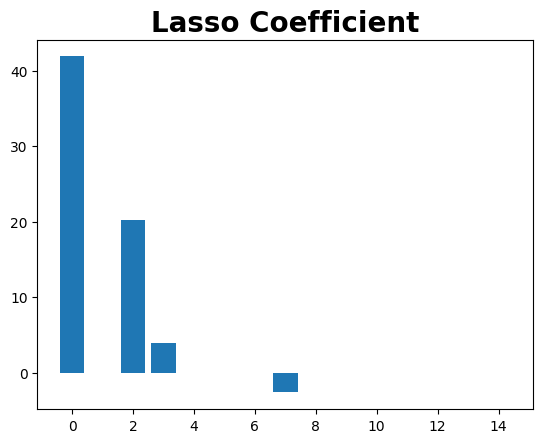

In [365]:
importance = la.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f"Feature: {i}, Scores: {v}")

plt.bar([x for x in range(len(importance))], importance)
plt.title("Lasso Coefficient", fontsize=20, fontweight='bold')
plt.show()

In [366]:
for j,i in enumerate(X.columns):
    print(j,i)

0 gdp
1 unemployment
2 property_price
3 personal_income
4 population
5 permit
6 new_homes
7 delinquency
8 men_married
9 men_unmarried_divorced
10 men_unmarried_widowed
11 women_married
12 women_unmarried_divorced
13 women_unmarried_widowed
14 immigrants


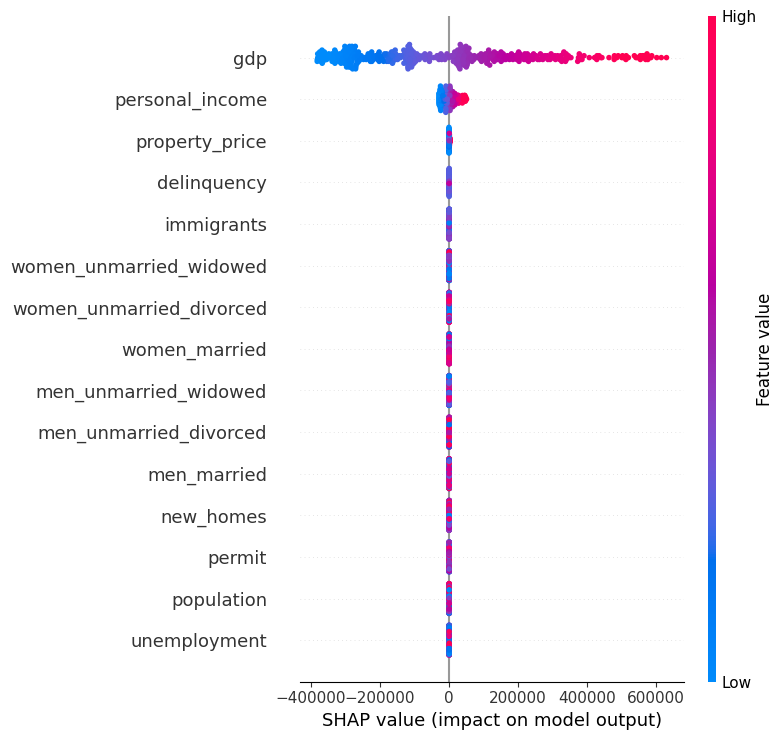

In [368]:
import shap

# Assuming las is a Lasso model fitted to your data
explainer = shap.Explainer(la, X)
shap_values = explainer(X)

# Plot SHAP values for feature importance
shap.summary_plot(shap_values, X)

Feature: 0, Scores: 35.26907023710423
Feature: 1, Scores: -1.3308513669387838
Feature: 2, Scores: 32.70000940074801
Feature: 3, Scores: 16.977256489682972
Feature: 4, Scores: 3.2999162446940282
Feature: 5, Scores: -5.328674869656079
Feature: 6, Scores: 1.3215871480610397
Feature: 7, Scores: 3.397443026931489
Feature: 8, Scores: -6.719815326405215
Feature: 9, Scores: 0.7529883962539197
Feature: 10, Scores: 3.7090501201523307
Feature: 11, Scores: -13.953623736215995
Feature: 12, Scores: -5.887684772115608
Feature: 13, Scores: 0.446522328504305
Feature: 14, Scores: -2.362414894581384


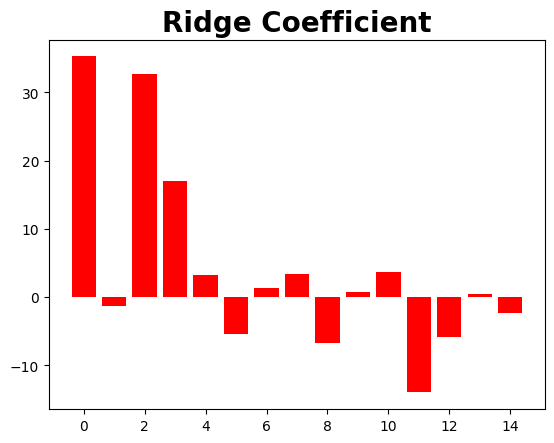

In [369]:
importance = ri.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f"Feature: {i}, Scores: {v}")
# plot feature importance
barr = plt.bar([x for x in range(len(importance))], importance,color = 'red')
plt.title("Ridge Coefficient", fontsize=20, fontweight='bold')
plt.show()

In [367]:
lr.coef_

array([ 74.48540942,   1.82035789,  30.58620848, -17.92463898,
        19.96172156,  -6.12699356,   0.09085205,  -3.57296464,
        -8.20173532,  -1.76175097,  -3.12357417, -26.90540887,
         0.90179028,   1.20387383,  -2.34479682])

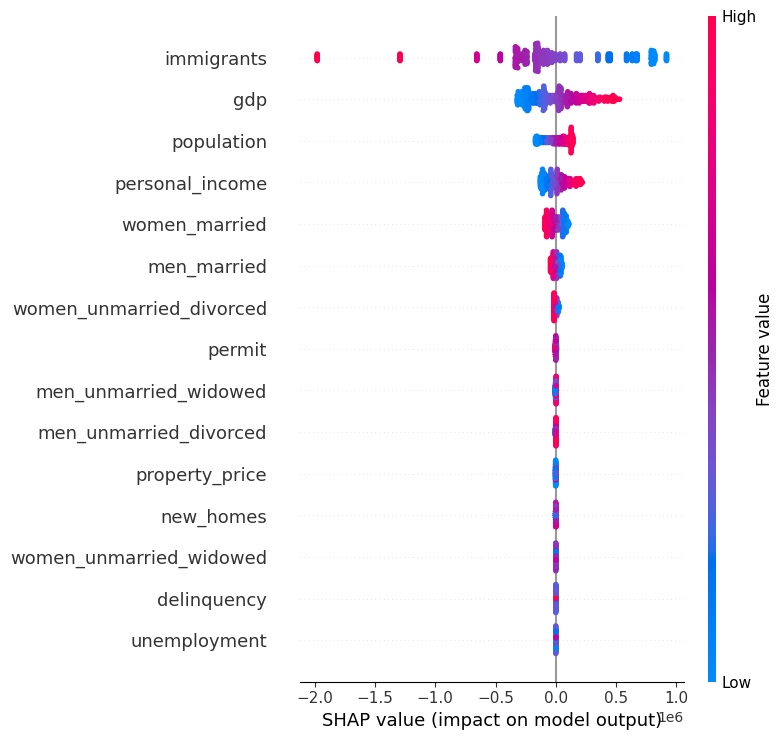

In [370]:
explainer = shap.Explainer(ri, X)
shap_values = explainer(X)

# Plot SHAP values for feature importance
shap.summary_plot(shap_values, X)

Feature: 0, Scores: 74.48540941891638
Feature: 1, Scores: 1.8203578900315556
Feature: 2, Scores: 30.586208479427118
Feature: 3, Scores: -17.924638984036896
Feature: 4, Scores: 19.96172155741837
Feature: 5, Scores: -6.126993559325592
Feature: 6, Scores: 0.09085205116704836
Feature: 7, Scores: -3.572964644655243
Feature: 8, Scores: -8.201735324879746
Feature: 9, Scores: -1.7617509718033777
Feature: 10, Scores: -3.1235741681082527
Feature: 11, Scores: -26.905408874001182
Feature: 12, Scores: 0.9017902776382156
Feature: 13, Scores: 1.2038738289273823
Feature: 14, Scores: -2.3447968232159635


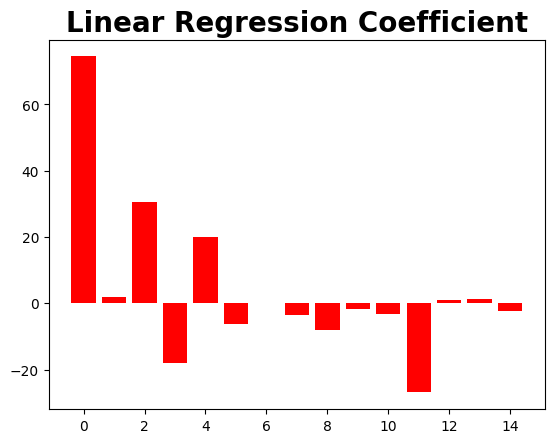

In [371]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f"Feature: {i}, Scores: {v}")
# plot feature importance
barr = plt.bar([x for x in range(len(importance))], importance,color = 'red')
plt.title("Linear Regression Coefficient", fontsize=20, fontweight='bold')
plt.show()

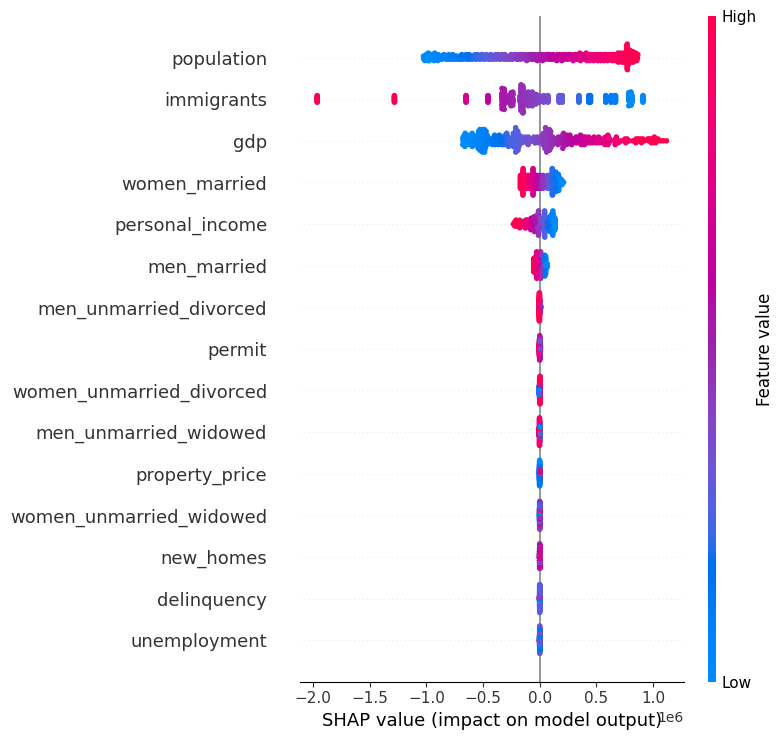

In [372]:
explainer = shap.Explainer(lr, X)
shap_values = explainer(X)

# Plot SHAP values for feature importance
shap.summary_plot(shap_values, X)

# **THANK YOU**